In [35]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

R = 4
r = 2
    
def torus_point(theta, phi, eta):
    return [math.cos(theta), math.sin(theta), math.cos(phi), math.sin(phi), math.cos(eta), math.sin(eta)]

n = 2
a = np.random.randn(n,n,n)
b = np.random.randn(n,n,n)

print(a)
#a = np.array([[ 0.89090698,  1.31282977], [-0.67674201, -1.17620531]])

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    eta = tp[2]
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([sum([-a[i,j,k]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi)*np.cos((k+1)*eta) for i in range(n)]) for j in range(n)]) for k in range(n)]),
            sum([sum([sum([a[i,j,k]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi)*np.cos((k+1)*eta) for i in range(n)]) for j in range(n)]) for k in range(n)]),
                    sum([sum([sum([-a[i,j,k]*(k+1)*np.cos((i+1)*theta)*np.sin((j+1)*phi)*np.sin((k+1)*eta) for i in range(n)]) for j in range(n)]) for k in range(n)])])

[[[ 1.58796509 -1.48089667]
  [-0.39329614 -0.4819722 ]]

 [[-2.59549642  0.13982917]
  [ 0.48445346  0.46402297]]]


In [36]:
def flow(init_tps):
    dt = 0.1
    num_steps = 25

    tps = np.empty((num_steps + 1, 3))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt
    print()
    xyzs = np.empty((num_steps + 1, 7))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1], tps[i][2])

    xyz_coords = np.empty((num_steps+1, 6))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 512
sqrt_N = 8.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))

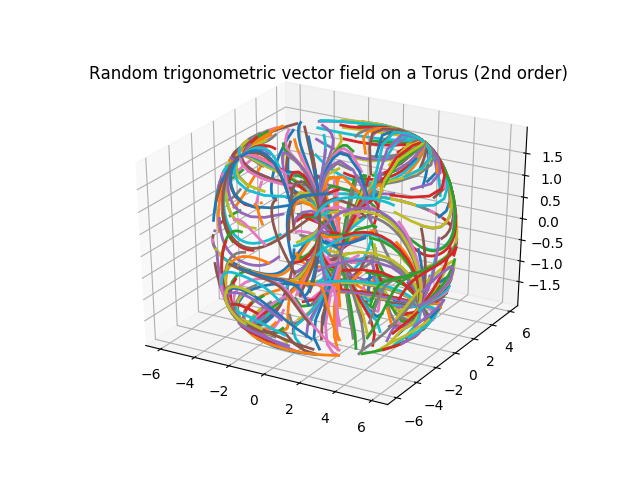

In [8]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Random trigonometric vector field on a Torus (2nd order)")
plt.show()
traj_list = xyzs

In [37]:
#traj_list = list_traj
traj_list = xyzs
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return xyz
    return np.hstack((xyz, 1*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      1*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 6)

print(A)
'''
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[-0.50606406, -0.01208695, -0.77824182,  0.09250119, -0.26805318, -1.80277067,
   0.65785078, -1.50108459,  1.40912873]]
'''
'''
A = [[ 0.26091896, -1.41097101,  0.83429924,  0.29977495,  1.58207845,  0.14060155,
   0.36938206, -0.35587076, -1.62595019],
 [-1.1529032, 0.54976141,  1.58742566,  1.51749454,  0.409861, 0.03610766,
  -0.82956347, 0.84117888, -0.72650092]]
'''
project = True

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
#traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(tlist_new[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = tlist_new

Trajectory shape before embedding:
(26, 7)
[[ 0.83678567  1.14612249 -0.8377003   0.50337707 -0.57439013 -0.53952244]]
Trajectory shape after embedding and projecting:
(26, 2)


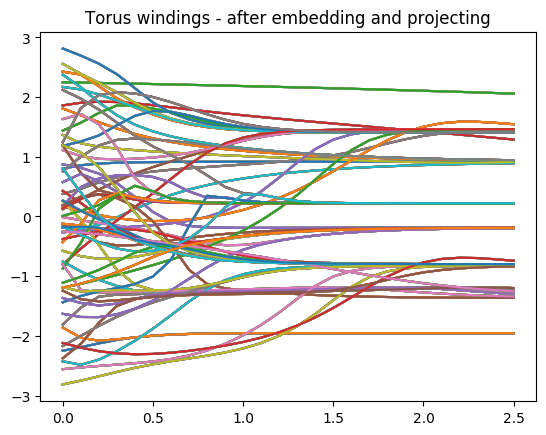

In [38]:
if project == True and list_traj[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(list_traj)):
        ax.plot(*list_traj[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(list_traj)):
        ax.plot(*list_traj[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()

In [22]:
t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(list_traj)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='3d_grad_random_trig_512_bw2_hd.npy')
if load == True:
    t2s.load_bifilt(filename='3d_grad_random_trig_512_bw2_hd.npy')

|██▉                                     | ▇▅▃ 9582/130816 [7%] in 8:05 (19 (31.1/s(30.2/in 10s (30.5 400/130816 [0%] in 13s (30.4▅▇▇ 404/130816 [0%] in 13s (30.3 453/130816 [0%] in 16s (29.0(28.1 ▆█▆ 543/130816 [0%] in 20s (27.1▃▁▃ 560/130816 [0%] in 21s (26.7 ▄▂▂ 670/130816 [1%] in 26s (25.4674/130816 [1%] in 27s (25.3 █▆▄ 735/130816 [1%] in 29s (25.0 765/130816 [1%] in 31s (24.8 828/130816 [1%] in 34s (24.5in 35s (24.5 in 43s (23. 1037/130816 [1%] in 43s (23.▁▃▅ 1042/130816 [1%] in 44s (23. 1049/130816 [1%] in 44s (23. (23.▆▄▂ 1143/130816 [1%] in 48s (23.1293/130816 [1%] in 55s (23.in 58s (23.1362/130816 [1%] in 59s (23.in 1:03 (231519/130816 [1%] in 1:06 (23 1526/130816 [1%] in 1:06 (23 ▂▂▄ 1550/130816 [1%] in 1:07 (23 in 1:07 (23 (22in 1:12 (22 ▁▃▅ 1674/130816 [1%] in 1:13 (22 ▃▁▃ 1745/130816 [1%] in 1:16 (22 1765/130816 [1%] in 1:17 (22 in 1:19 (22 (22in 1:20 (22 in 1:22 (22▅▃▁ 1868/130816 [1%] in 1:22 (22in 1:24 (22in 1:27 (221982/130816 [2%] in 1:28 (22▃▁▃ 1990/130816 [2%] in 1

|█████▌                                  | ▇▇▅ 17884/130816 [14%] in 15:06 ▄▂▂ 9594/130816 [7%] in 8:05 (19 9650/130816 [7%] in 8:08 (19 9675/130816 [7%] in 8:09 (199705/130816 [7%] in 8:11 (199716/130816 [7%] in 8:12 (19(19 ▇▇▅ 9742/130816 [7%] in 8:13 (19 ▇▅▃ 9747/130816 [7%] in 8:13 (19▆▄▂ 9785/130816 [7%] in 8:15 (19 █▆▄ 9817/130816 [8%] in 8:17 (19 9831/130816 [8%] in 8:18 (19▇▅▃ 9862/130816 [8%] in 8:19 (19in 8:20 (19 ▅▃▁ 9901/130816 [8%] in 8:21 (19 (19 ▇▅▃ 9936/130816 [8%] in 8:23 (19 (199984/130816 [8%] in 8:25 (19(19 (19in 8:28 (1▂▂▄ 10040/130816 [8%] in 8:28 (1 10058/130816 [8%] in 8:29 (110076/130816 [8%] in 8:30 (1 in 8:31 (1 10089/130816 [8%] in 8:31 (1▅▇▇ 10094/130816 [8%] in 8:31 (1 10118/130816 [8%] in 8:32 (1 (1in 8:34 (1 (1 ▄▂▂ 10162/130816 [8%] in 8:35 (1 (1 █▆▄ 10191/130816 [8%] in 8:36 (1▁▃▅ 10211/130816 [8%] in 8:37 (1in 8:39 (1 10261/130816 [8%] in 8:39 (1▆█▆ 10301/130816 [8%] in 8:41 (1(1in 8:44 (1 10366/130816 [8%] in 8:45 (1 in 8:46 (1 ▄▂▂ 10401/130816 [8%] i

|███████▊                                | ▅▇▇ 25420/130816 [19%] in 21:28   ▄▂▂ 17900/130816 [14%] in 15:07  ▃▁▃ 17904/130816 [14%] in 15:07 in 15:07 in 15:07  17920/130816 [14%] in 15:08  17935/130816 [14%] in 15:08  ▇▅▃ 18005/130816 [14%] in 15:12   ▃▁▃ 18018/130816 [14%] in 15:13  in 15:14 18059/130816 [14%] in 15:15  18087/130816 [14%] in 15:16 18090/130816 [14%] in 15:16 ▄▆█ 18119/130816 [14%] in 15:18 ▁▃▅ 18146/130816 [14%] in 15:19 ▃▅▇ 18152/130816 [14%] in 15:20 in 15:20  ▄▆█ 18191/130816 [14%] in 15:22 in 15:22 ▄▆█ 18234/130816 [14%] in 15:24 18246/130816 [14%] in 15:24  ▃▁▃ 18259/130816 [14%] in 15:25  ▃▅▇ 18269/130816 [14%] in 15:26  ▄▂▂ 18296/130816 [14%] in 15:27  in 15:27   18375/130816 [14%] in 15:31 ▂▄▆ 18393/130816 [14%] in 15:32 18395/130816 [14%] in 15:32  18437/130816 [14%] in 15:34 ▇▅▃ 18449/130816 [14%] in 15:35  ▇▇▅ 18557/130816 [14%] in 15:40 in 15:40 in 15:41 in 15:41  18586/130816 [14%] in 15:41 █▆▄ 18635/130816 [14%] in 15:44 ▇▅▃ 18640/130816 [14%] in 15:44 

|██████████▎                             | ▇▅▃ 33467/130816 [26%] in 28:16 ▂▄▆ 25448/130816 [19%] in 21:29   in 21:31 25515/130816 [20%] in 21:33  25587/130816 [20%] in 21:36   in 21:37 ▄▆█ 25613/130816 [20%] in 21:38  25628/130816 [20%] in 21:38  in 21:39  in 21:40  25655/130816 [20%] in 21:40  in 21:41 in 21:41  in 21:41 25699/130816 [20%] in 21:42 in 21:44 25761/130816 [20%] in 21:45 25810/130816 [20%] in 21:48 25820/130816 [20%] in 21:48 ▇▇▅ 25824/130816 [20%] in 21:49  25862/130816 [20%] in 21:51  25881/130816 [20%] in 21:51  ▄▆█ 25893/130816 [20%] in 21:52 25931/130816 [20%] in 21:54 25935/130816 [20%] in 21:54 ▆█▆ 25939/130816 [20%] in 21:54  25947/130816 [20%] in 21:55  in 21:56 in 21:57  ▄▆█ 26013/130816 [20%] in 21:58  26024/130816 [20%] in 21:59   in 22:00  ▁▃▅ 26109/130816 [20%] in 22:03  ▃▅▇ 26118/130816 [20%] in 22:03  ▅▇▇ 26121/130816 [20%] in 22:04  █▆▄ 26129/130816 [20%] in 22:04  26151/130816 [20%] in 22:05  in 22:05 in 22:06  ▂▄▆ 26187/130816 [20%] in 22:07 26198/130

|████████████▋                           | ▄▆█ 41332/130816 [32%] in 34:56  in 28:17  in 28:18 33539/130816 [26%] in 28:19 ▂▄▆ 33609/130816 [26%] in 28:23   in 28:23 ▆▄▂ 33633/130816 [26%] in 28:24 ▃▁▃ 33646/130816 [26%] in 28:25 33650/130816 [26%] in 28:25 in 28:26  33697/130816 [26%] in 28:27  ▂▄▆ 33700/130816 [26%] in 28:28  ▄▆█ 33707/130816 [26%] in 28:28 33738/130816 [26%] in 28:29  33794/130816 [26%] in 28:32 33813/130816 [26%] in 28:33 33859/130816 [26%] in 28:36  ▆▄▂ 33865/130816 [26%] in 28:36  33896/130816 [26%] in 28:38  33907/130816 [26%] in 28:38  ▇▇▅ 33934/130816 [26%] in 28:40  ▃▅▇ 33960/130816 [26%] in 28:41 █▆▄ 33976/130816 [26%] in 28:42 34012/130816 [26%] in 28:44 in 28:45  ▄▆█ 34040/130816 [26%] in 28:45 ▆█▆ 34045/130816 [26%] in 28:45 ▄▂▂ 34063/130816 [26%] in 28:46  34088/130816 [26%] in 28:47 34091/130816 [26%] in 28:47  ▆▄▂ 34094/130816 [26%] in 28:48  34097/130816 [26%] in 28:48   in 28:50 ▁▃▅ 34152/130816 [26%] in 28:51   34176/130816 [26%] in 28:52 in 28:54 ▇

|█████████████████▎                      | ▇▇▅ 56330/130816 [43%] in 47:38  in 41:20   ▆█▆ 48937/130816 [37%] in 41:22 ▇▇▅ 48941/130816 [37%] in 41:22  in 41:25  49032/130816 [37%] in 41:27 █▆▄ 49058/130816 [38%] in 41:28  in 41:31  ▆█▆ 49137/130816 [38%] in 41:32  in 41:33  ▅▃▁ 49155/130816 [38%] in 41:33  ▇▇▅ 49219/130816 [38%] in 41:36 in 41:37 49268/130816 [38%] in 41:39 in 41:40  49313/130816 [38%] in 41:41  in 41:41  49389/130816 [38%] in 41:45  ▄▆█ 49404/130816 [38%] in 41:46  █▆▄ 49413/130816 [38%] in 41:46 in 41:47  49481/130816 [38%] in 41:50  ▇▅▃ 49493/130816 [38%] in 41:50 in 41:55 in 41:57 in 41:57 in 41:57  49653/130816 [38%] in 41:58 49668/130816 [38%] in 41:59  49692/130816 [38%] in 42:00 49704/130816 [38%] in 42:01  ▂▂▄ 49775/130816 [38%] in 42:05 in 42:06 49832/130816 [38%] in 42:07   ▁▃▅ 49860/130816 [38%] in 42:09 ▂▂▄ 49900/130816 [38%] in 42:11 ▁▃▅ 49905/130816 [38%] in 42:11 ▂▄▆ 49909/130816 [38%] in 42:11  49917/130816 [38%] in 42:12 ▆█▆ 49920/130816 [38%] in 42:

|███████████████████▊                    | █▆▄ 64647/130816 [49%] in 54:38  56374/130816 [43%] in 47:40 56382/130816 [43%] in 47:41 ▃▁▃ 56392/130816 [43%] in 47:41  █▆▄ 56415/130816 [43%] in 47:42 ▁▃▅ 56432/130816 [43%] in 47:43 in 47:43  in 47:44 56447/130816 [43%] in 47:44  56455/130816 [43%] in 47:44  56460/130816 [43%] in 47:45 ▁▃▅ 56468/130816 [43%] in 47:45  ▅▇▇ 56512/130816 [43%] in 47:47  56605/130816 [43%] in 47:52 56663/130816 [43%] in 47:55  56668/130816 [43%] in 47:55 ▇▇▅ 56673/130816 [43%] in 47:55  56715/130816 [43%] in 47:57 56719/130816 [43%] in 47:58 56722/130816 [43%] in 47:58 ▄▂▂ 56728/130816 [43%] in 47:58  56747/130816 [43%] in 47:59  ▆▄▂ 56760/130816 [43%] in 48:00   56792/130816 [43%] in 48:01 in 48:02  in 48:02  ▅▇▇ 56861/130816 [43%] in 48:05  ▅▃▁ 56910/130816 [44%] in 48:07 56923/130816 [44%] in 48:08 in 48:08  ▄▆█ 56931/130816 [44%] in 48:08 ▂▂▄ 56960/130816 [44%] in 48:10 in 48:12 ▁▃▅ 57073/130816 [44%] in 48:16  in 48:16  ▁▃▅ 57118/130816 [44%] in 48:18 571

|██████████████████████                  | ▂▄▆ 72054/130816 [55%] in 1:01:0 ▅▃▁ 64653/130816 [49%] in 54:38  ▇▅▃ 64685/130816 [49%] in 54:40  in 54:43 64771/130816 [50%] in 54:45  64775/130816 [50%] in 54:45  ▁▃▅ 64813/130816 [50%] in 54:47 in 54:47 ▄▆█ 64822/130816 [50%] in 54:47 64841/130816 [50%] in 54:48 in 54:49  in 54:49   in 54:49 ▅▇▇ 64867/130816 [50%] in 54:50 ▇▅▃ 64916/130816 [50%] in 54:52  in 54:53 64960/130816 [50%] in 54:54  ▃▁▃ 65003/130816 [50%] in 54:57 65038/130816 [50%] in 54:58 in 55:00  in 55:00 65094/130816 [50%] in 55:01 ▅▃▁ 65150/130816 [50%] in 55:04 in 55:04  ▅▃▁ 65185/130816 [50%] in 55:06 65198/130816 [50%] in 55:07  in 55:09  65269/130816 [50%] in 55:10  ▇▇▅ 65286/130816 [50%] in 55:11  65342/130816 [50%] in 55:14  in 55:15 ▄▂▂ 65380/130816 [50%] in 55:16 65424/130816 [50%] in 55:18 65480/130816 [50%] in 55:21 65493/130816 [50%] in 55:22 65523/130816 [50%] in 55:23 in 55:24  ▂▄▆ 65540/130816 [50%] in 55:24 ▂▂▄ 65571/130816 [50%] in 55:26  ▅▃▁ 65598/130816 [

|████████████████████████▊               | ▅▇▇ 80898/130816 [62%] in 1:08:372075/130816 [55%] in 1:01:072192/130816 [55%] in 1:01:1 in 1:01:172207/130816 [55%] in 1:01:1▂▂▄ 72278/130816 [55%] in 1:01:1 72328/130816 [55%] in 1:01:1▇▅▃ 72379/130816 [55%] in 1:01:1█▆▄ 72488/130816 [55%] in 1:01:2 in 1:01:2▃▁▃ 72542/130816 [55%] in 1:01:272552/130816 [55%] in 1:01:2 in 1:01:3in 1:01:3 ▂▄▆ 72667/130816 [56%] in 1:01:3 72680/130816 [56%] in 1:01:3 in 1:01:3▆▄▂ 72692/130816 [56%] in 1:01:3in 1:01:3in 1:01:372734/130816 [56%] in 1:01:3 ▂▄▆ 72753/130816 [56%] in 1:01:3 72787/130816 [56%] in 1:01:4 ▂▄▆ 72794/130816 [56%] in 1:01:4 72811/130816 [56%] in 1:01:4 72842/130816 [56%] in 1:01:472900/130816 [56%] in 1:01:4 72956/130816 [56%] in 1:01:4in 1:01:5█▆▄ 73041/130816 [56%] in 1:01:5 in 1:01:5 in 1:01:5 ▇▇▅ 73160/130816 [56%] in 1:01:5in 1:02:0 73251/130816 [56%] in 1:02:0 ▁▃▅ 73261/130816 [56%] in 1:02:0▂▄▆ 73263/130816 [56%] in 1:02:0 ▅▇▇ 73270/130816 [56%] in 1:02:0 73289/130816 [56%] in 1:02

|███████████████████████████▍            | ▅▃▁ 89385/130816 [68%] in 1:15:3 80924/130816 [62%] in 1:08:380927/130816 [62%] in 1:08:3in 1:08:3 in 1:08:3 80968/130816 [62%] in 1:08:3in 1:08:3 80988/130816 [62%] in 1:08:3 ▄▂▂ 81010/130816 [62%] in 1:08:3 81052/130816 [62%] in 1:08:3 in 1:08:4 in 1:08:4▃▅▇ 81101/130816 [62%] in 1:08:4 ▄▆█ 81138/130816 [62%] in 1:08:481161/130816 [62%] in 1:08:4in 1:08:4in 1:08:481186/130816 [62%] in 1:08:4 ▂▂▄ 81204/130816 [62%] in 1:08:481209/130816 [62%] in 1:08:4 in 1:08:581288/130816 [62%] in 1:08:581327/130816 [62%] in 1:08:5▄▆█ 81342/130816 [62%] in 1:08:5 81354/130816 [62%] in 1:08:581380/130816 [62%] in 1:08:5in 1:08:5▄▂▂ 81410/130816 [62%] in 1:08:5 81428/130816 [62%] in 1:08:5in 1:09:0 in 1:09:0▆█▆ 81510/130816 [62%] in 1:09:0▇▅▃ 81519/130816 [62%] in 1:09:0 in 1:09:0 in 1:09:0 █▆▄ 81668/130816 [62%] in 1:09:1 in 1:09:1 in 1:09:1 in 1:09:1 █▆▄ 81819/130816 [63%] in 1:09:1 in 1:09:181897/130816 [63%] in 1:09:2▆▄▂ 81902/130816 [63%] in 1:09:2▂▄▆ 81

|██████████████████████████████          | ▃▁▃ 98243/130816 [75%] in 1:23:0 in 1:15:4in 1:15:489536/130816 [68%] in 1:15:4 ▂▂▄ 89552/130816 [68%] in 1:15:4 ▆█▆ 89568/130816 [68%] in 1:15:4 ▄▆█ 89599/130816 [68%] in 1:15:5▆█▆ 89607/130816 [68%] in 1:15:5 89624/130816 [69%] in 1:15:5 in 1:15:5▃▅▇ 89636/130816 [69%] in 1:15:589661/130816 [69%] in 1:15:5▂▂▄ 89666/130816 [69%] in 1:15:5 in 1:15:5 in 1:15:5 89707/130816 [69%] in 1:15:5 █▆▄ 89734/130816 [69%] in 1:15:5 in 1:15:5 in 1:15:5 in 1:15:5 ▆▄▂ 89779/130816 [69%] in 1:15:5 89806/130816 [69%] in 1:16:089827/130816 [69%] in 1:16:0 ▆▄▂ 89861/130816 [69%] in 1:16:0 in 1:16:0 in 1:16:0 89955/130816 [69%] in 1:16:0in 1:16:0 ▄▆█ 89995/130816 [69%] in 1:16:1▁▃▅ 90027/130816 [69%] in 1:16:1▂▄▆ 90069/130816 [69%] in 1:16:1in 1:16:1 in 1:16:1 in 1:16:1▁▃▅ 90106/130816 [69%] in 1:16:190110/130816 [69%] in 1:16:1in 1:16:190135/130816 [69%] in 1:16:1 90265/130816 [69%] in 1:16:290280/130816 [69%] in 1:16:2 ▂▂▄ 90345/130816 [69%] in 1:16:2 90397/130

|████████████████████████████████▋       | ▂▄▆ 106783/130816 [82%] in 1:30: ▇▅▃ 98269/130816 [75%] in 1:23:0▃▁▃ 98278/130816 [75%] in 1:23:0▂▂▄ 98281/130816 [75%] in 1:23:0 ▁▃▅ 98286/130816 [75%] in 1:23:0in 1:23:1 in 1:23:1 ▄▂▂ 98357/130816 [75%] in 1:23:1in 1:23:198390/130816 [75%] in 1:23:198413/130816 [75%] in 1:23:1 ▇▅▃ 98472/130816 [75%] in 1:23:198478/130816 [75%] in 1:23:198481/130816 [75%] in 1:23:1 ▅▇▇ 98503/130816 [75%] in 1:23:1▆█▆ 98506/130816 [75%] in 1:23:198513/130816 [75%] in 1:23:1 98526/130816 [75%] in 1:23:2▅▇▇ 98576/130816 [75%] in 1:23:2 98679/130816 [75%] in 1:23:2▃▅▇ 98683/130816 [75%] in 1:23:2 in 1:23:2▄▆█ 98721/130816 [75%] in 1:23:3 98728/130816 [75%] in 1:23:398738/130816 [75%] in 1:23:3▃▅▇ 98797/130816 [76%] in 1:23:3 98815/130816 [76%] in 1:23:3 in 1:23:3 98835/130816 [76%] in 1:23:3█▆▄ 98854/130816 [76%] in 1:23:3 98861/130816 [76%] in 1:23:3in 1:23:3 98899/130816 [76%] in 1:23:3 in 1:23:4 98937/130816 [76%] in 1:23:4▆▄▂ 98942/130816 [76%] in 1:23:4 9895

|███████████████████████████████████▌    | ▆█▆ 115905/130816 [89%] in 1:37: 106806/130816 [82%] in 1:30:106821/130816 [82%] in 1:30:106841/130816 [82%] in 1:30: ▁▃▅ 106857/130816 [82%] in 1:30: ▂▂▄ 106895/130816 [82%] in 1:30: ▁▃▅ 106898/130816 [82%] in 1:30:▂▄▆ 106902/130816 [82%] in 1:30: in 1:30: ▃▅▇ 106945/130816 [82%] in 1:30:█▆▄ 106961/130816 [82%] in 1:30: in 1:30: 107099/130816 [82%] in 1:30:107133/130816 [82%] in 1:30:in 1:30:▂▄▆ 107182/130816 [82%] in 1:30:▅▇▇ 107193/130816 [82%] in 1:30: 107196/130816 [82%] in 1:30:▇▇▅ 107200/130816 [82%] in 1:30: in 1:30:▅▇▇ 107354/130816 [82%] in 1:30:107363/130816 [82%] in 1:30: 107370/130816 [82%] in 1:30: ▄▂▂ 107375/130816 [82%] in 1:30:107383/130816 [82%] in 1:30:in 1:30:in 1:30:in 1:30:in 1:30:▁▃▅ 107431/130816 [82%] in 1:30:in 1:30: ▃▅▇ 107475/130816 [82%] in 1:30:▄▆█ 107479/130816 [82%] in 1:30: ▅▇▇ 107483/130816 [82%] in 1:30:107496/130816 [82%] in 1:30:in 1:30:107520/130816 [82%] in 1:30:in 1:30: in 1:30: 107618/130816 [82%] in 1:

|██████████████████████████████████████  | ▄▂▂ 124301/130816 [95%] in 1:45:115937/130816 [89%] in 1:38:▆█▆ 115979/130816 [89%] in 1:38:115983/130816 [89%] in 1:38:in 1:38:in 1:38: ▆█▆ 116023/130816 [89%] in 1:38:▃▁▃ 116044/130816 [89%] in 1:38: in 1:38: in 1:38:▆█▆ 116143/130816 [89%] in 1:38:▆▄▂ 116152/130816 [89%] in 1:38: in 1:38:116192/130816 [89%] in 1:38: ▅▃▁ 116269/130816 [89%] in 1:38: in 1:38:in 1:38: ▃▁▃ 116356/130816 [89%] in 1:38:▂▂▄ 116360/130816 [89%] in 1:38: in 1:38:▅▃▁ 116430/130816 [89%] in 1:38:▆█▆ 116455/130816 [89%] in 1:38:116472/130816 [89%] in 1:38: 116490/130816 [89%] in 1:38: ▇▅▃ 116579/130816 [89%] in 1:38:in 1:38:116642/130816 [89%] in 1:38:in 1:38: ▇▇▅ 116685/130816 [89%] in 1:38: in 1:38:in 1:38:▃▁▃ 116701/130816 [89%] in 1:38: ▂▂▄ 116705/130816 [89%] in 1:38: in 1:38: ▅▇▇ 116719/130816 [89%] in 1:38:in 1:38: 116745/130816 [89%] in 1:38: in 1:38: 116802/130816 [89%] in 1:38: █▆▄ 116841/130816 [89%] in 1:38: 116887/130816 [89%] in 1:38: in 1:38:116926/13081

|████████████████████████████████████████| 130816/130816 [100%] in 1:50:30.124314/130816 [95%] in 1:45:▃▅▇ 124317/130816 [95%] in 1:45: in 1:45: 124428/130816 [95%] in 1:45:124497/130816 [95%] in 1:45: in 1:45:124587/130816 [95%] in 1:45:in 1:45:▂▂▄ 124675/130816 [95%] in 1:45:in 1:45:in 1:45: in 1:45:▃▅▇ 124725/130816 [95%] in 1:45: 124729/130816 [95%] in 1:45:124738/130816 [95%] in 1:45:in 1:45: in 1:45:124849/130816 [95%] in 1:45: ▁▃▅ 124923/130816 [95%] in 1:45: ▇▅▃ 124945/130816 [96%] in 1:45:124986/130816 [96%] in 1:45:in 1:45: in 1:45: in 1:45: 125127/130816 [96%] in 1:45: 125134/130816 [96%] in 1:45:125146/130816 [96%] in 1:45: in 1:45:▇▇▅ 125250/130816 [96%] in 1:45:125262/130816 [96%] in 1:45: 125272/130816 [96%] in 1:45:in 1:45: 125381/130816 [96%] in 1:45: in 1:45: in 1:45: ▂▄▆ 125467/130816 [96%] in 1:46:in 1:46: in 1:46: in 1:46: ▂▄▆ 125620/130816 [96%] in 1:46: in 1:46:▅▃▁ 125649/130816 [96%] in 1:46: in 1:46: 125685/130816 [96%] in 1:46: ▃▅▇ 125707/130816 [96%] in 1:46:

(26, 512, 512)


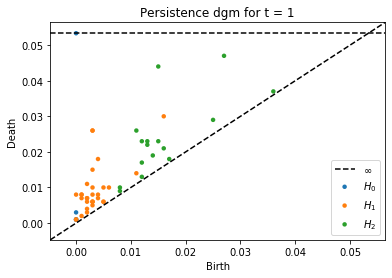

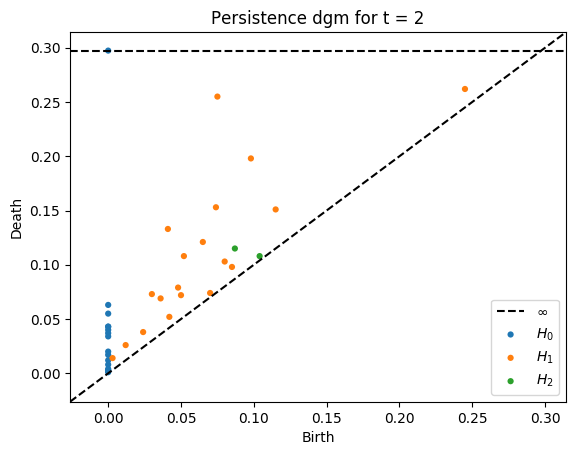

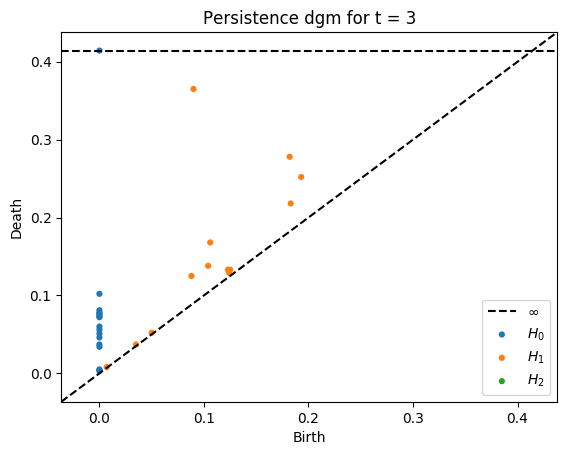

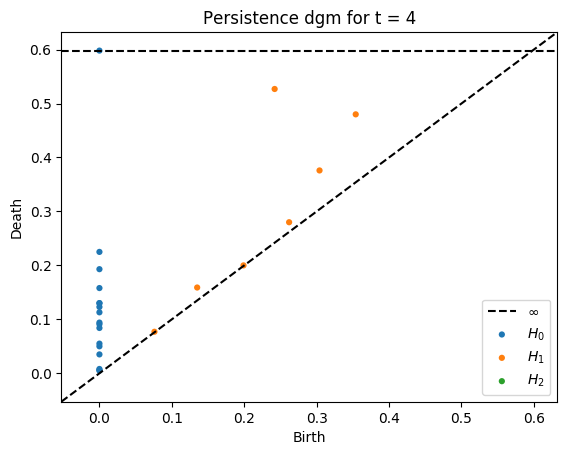

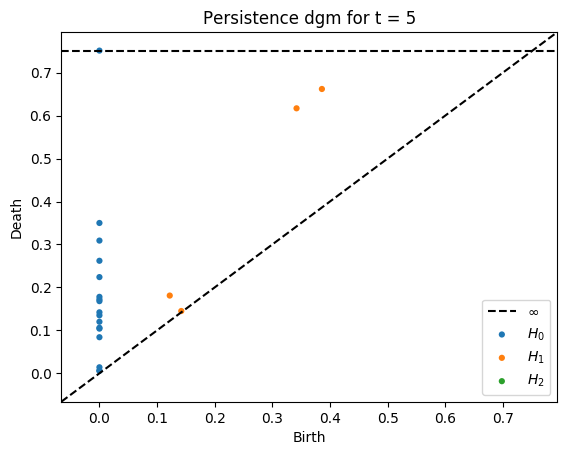

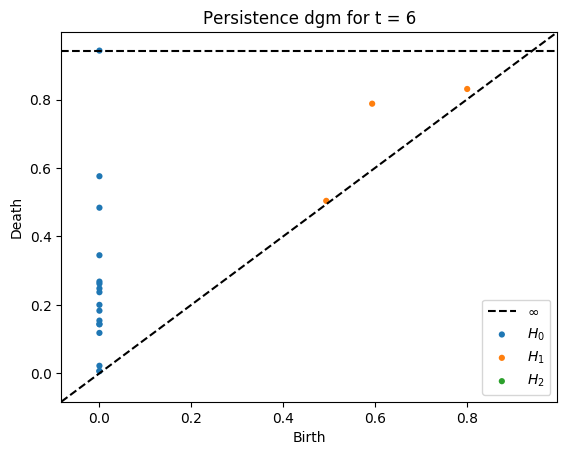

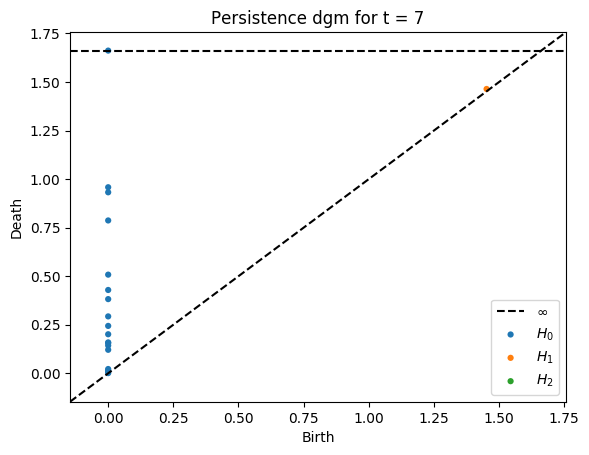

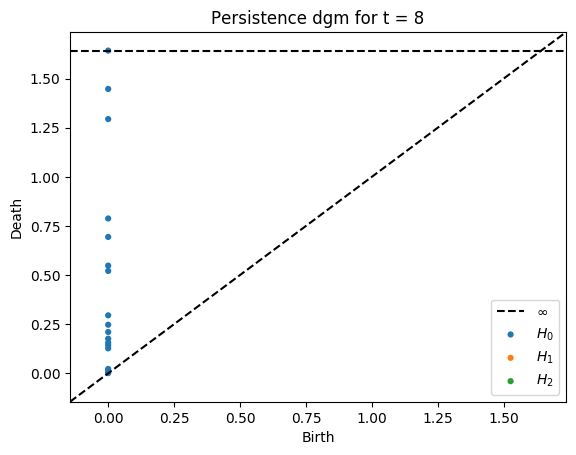

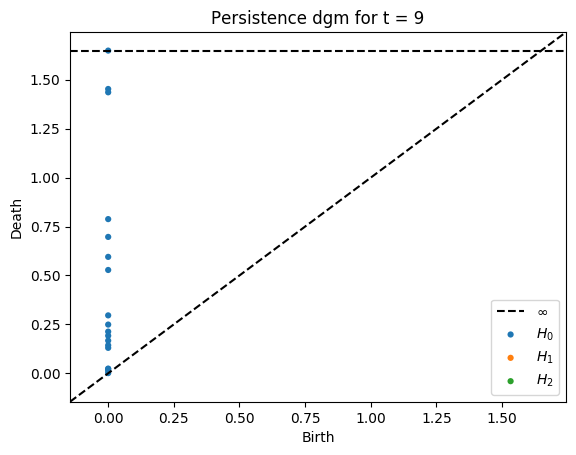

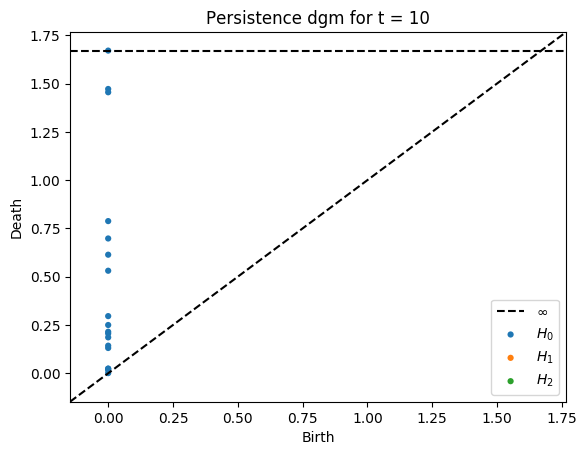

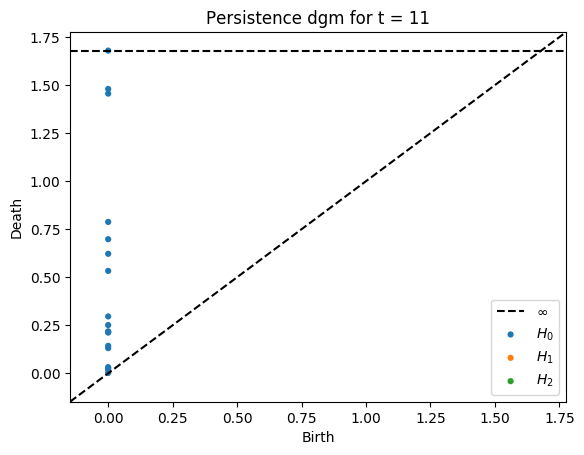

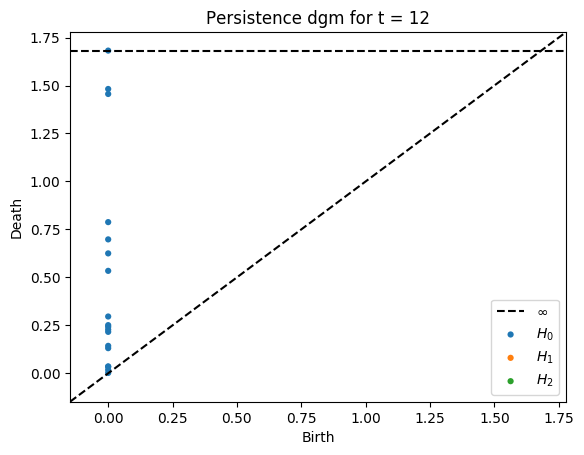

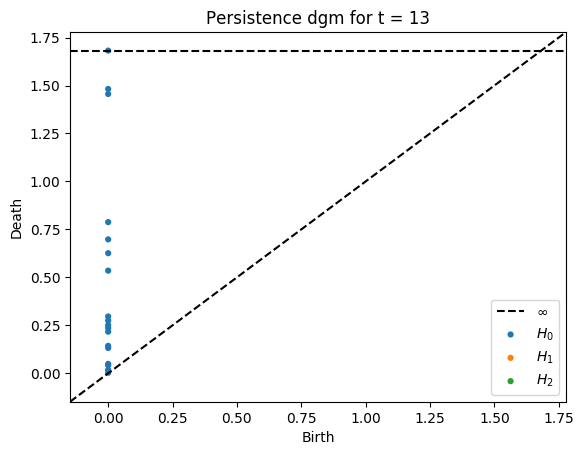

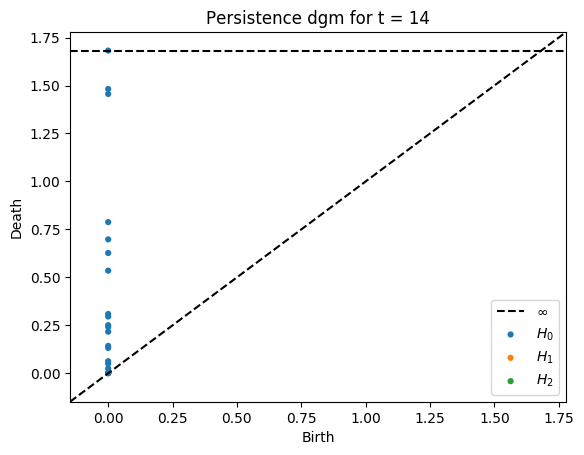

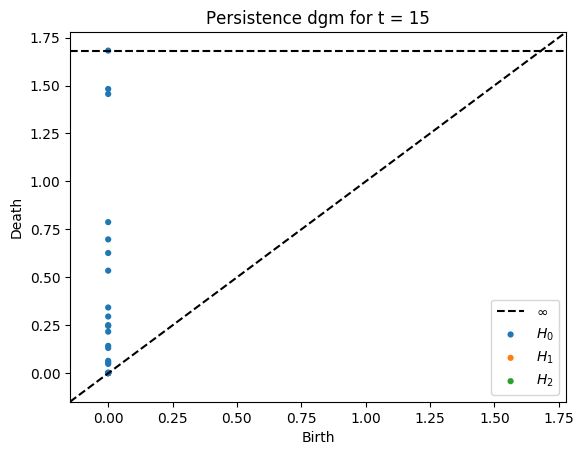

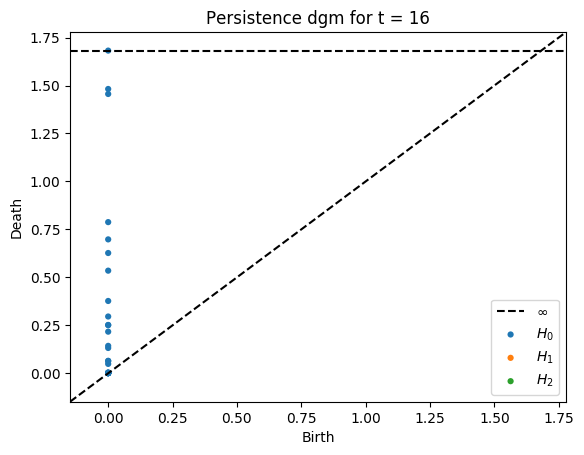

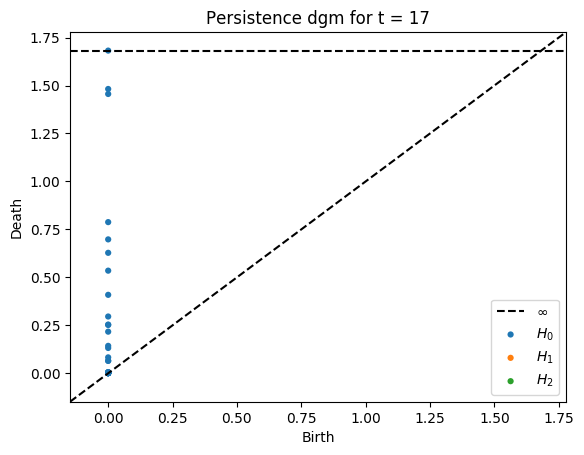

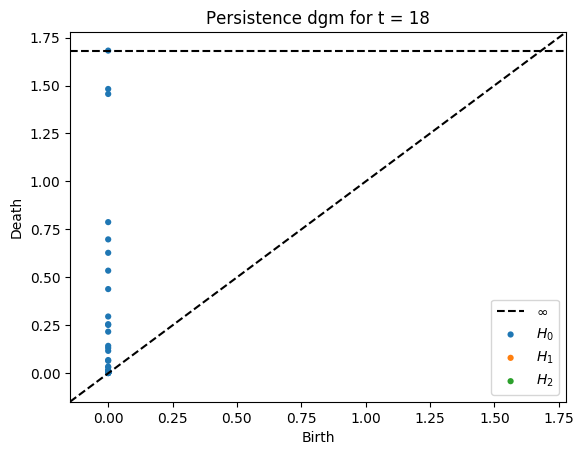

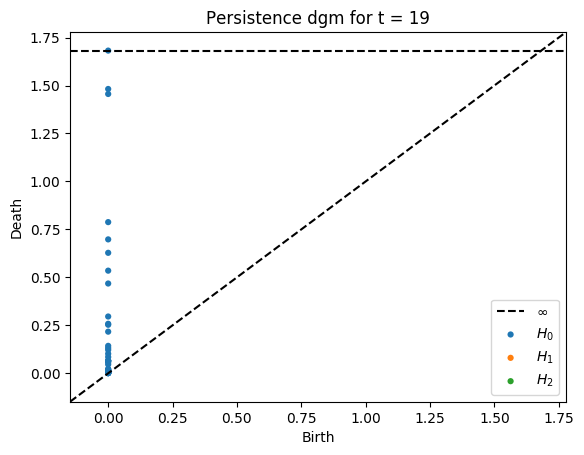

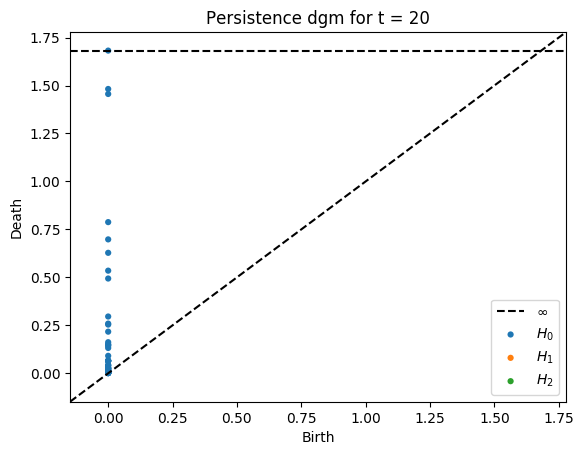

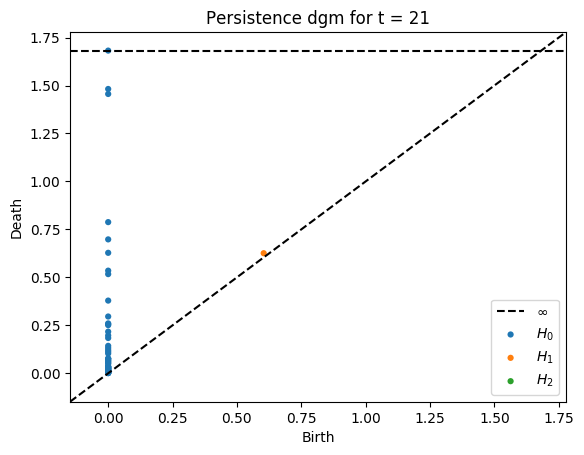

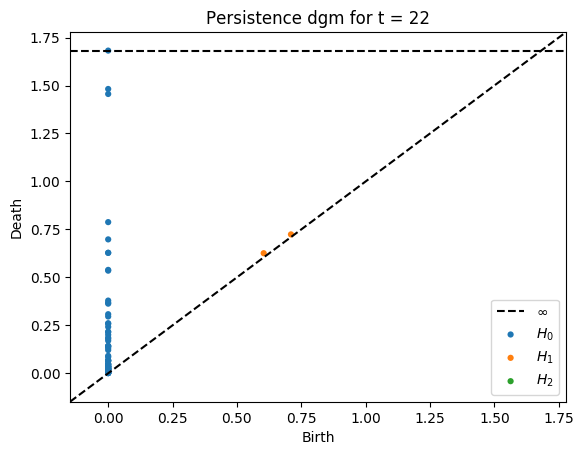

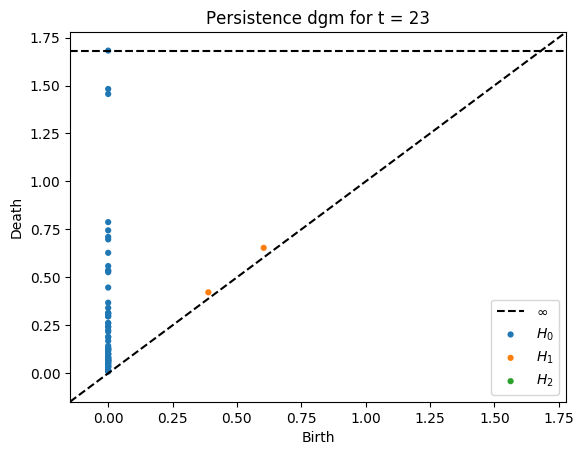

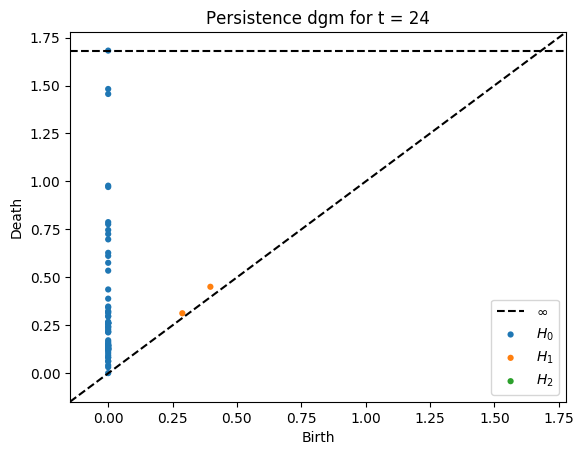

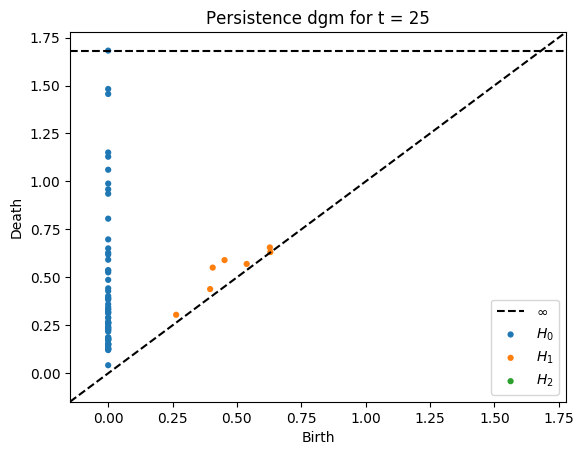

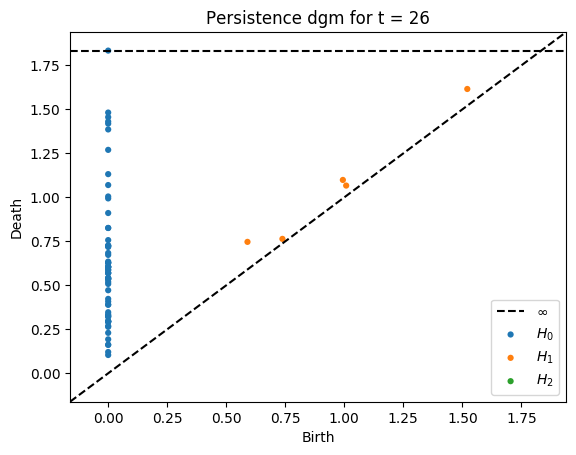

In [24]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)